# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "aiml_pg_25" #@param {type:"string"}


In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "4521452411" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "U3W12_Demo_CNN_Pytorch" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():

    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts() and getComments():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()

else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


## Introduction

This notebook aims at discovering Convolutional Neural Network. We will see the theory behind it, and an implementation in Pytorch on FashionMNIST dataset.


In [4]:
!pip3 install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import torchvision
from torchvision import datasets, transforms, models

from torchviz import make_dot

import numpy as np

import os
os.environ["PATH"] += os.pathsep + r"libraries/graphviz-2.38/release/bin"

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes

![FashionMNIST Dataset](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

Pytorch's torchvision module conveniently packages the FashionMNIST dataset into a `torchvision.datasets.FashionMNIST` class for us. We simply need to specify the dataset split (train/test) and the transformations and augmentations we want to apply on each image. We wrap the dataset objects via Pytorch's `torch.utils.data.DataLoader` class to get dataloaders which will return entire batches of samples, and also optionally shuffle the dataset internally.

In [6]:
'''
Training time transformations and problem specific data augmentations can be applied here.
see : https://pytorch.org/docs/stable/torchvision/transforms.html
'''
transforms_train = transforms.Compose([
    transforms.ToTensor(),
    # We've computed the mean and variance for this dataset beforehand, so we can plug it in here
    transforms.Normalize((0.1307,), (0.3081,))
])
'''
FashionMNIST is a subclass of torch.utils.data.Dataset, and have __getitem__ and __len__ methods implemented. For creating
custom datasets you will have to inherit Dataset class and override __len__() and __getitem__()
'''
dataset_train = datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transforms_train
)
'''
Pass dataset object to DataLoader, which will later be used for iterating over minibatches
'''
dataloader_train = DataLoader(
    dataset_train, batch_size=128, shuffle=True,
)

'''
Repeat the same thing (defining transforms => dataset instantiation => dataloader creationg) for the test set
'''
transforms_test =transforms.Compose([
    transforms.ToTensor(),
    # We've computed the mean and variance for this dataset beforehand, so we can plug it in here
    transforms.Normalize((0.1307,), (0.3081,))
])

dataset_test = datasets.FashionMNIST(
    root='./data', train=False, download=False, transform=transforms_test
)

dataloader_test = DataLoader(
    dataset_test, batch_size=128, shuffle=False,
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 171kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.20MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 18.5MB/s]


We now create a CNN class, which has to be a subclass of `torch.nn.Module` and have its own `__init__` and `forward` functions.

We choose a simple architecture with `3 convolutional blocks` followed by `2 fully connected blocks`.

For layers that do not have any parameters, i.e. layers that are simple mathematical operations on the input, such as ReLU, sigmoid, tanh, softmax, dropout, etc., Pytorch provides a `torch.nn.functional` module with such layers.

While one can create a ReLU layer by using `nn.ReLU`, it's easier to just call `torch.nn.functional.relu` on a tensor. This helps reduce clutter, since large models can have many such layers.

NOTE: We import `torch.nn.functional` as the alias `F`.

In [7]:
class CNN(nn.Module):
    def __init__(self):
        #super(CNN, self).__init__()
        super().__init__()
        # nn.Conv2d API : torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1)  # 32 filters of 5x5 size and depth 1 (since input channel = 1)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5) # 32 filters of 5x5 size and depth 32 (since input channel =  1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=5) # 64 filters of 5x5 size and depth 32 #params = 64x5x5x32 + 64
        # nn.Linear API : torch.nn.Linear(in_features, out_features, bias=True)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        # BLOCK 1: CONV + RELU
        x = F.relu(self.conv1(x))
        # BLOCK 2: CONV + MAXPOOL + RELU + DROPOUT
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        # BLOCK 3: CONV + MAXPOOL + RELU + DROPOUT
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        # FLATTEN
        x = x.flatten(start_dim=1)
        # BLOCK 4: FC + RELU + DROPOUT
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        # BLOCK 5: FC + LOG SOFTMAX
        x = F.log_softmax(self.fc2(x), dim=1)
        return x

model = CNN()
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


torch.Size([128, 1, 28, 28]) torch.Size([128]) torch.Size([128, 10])


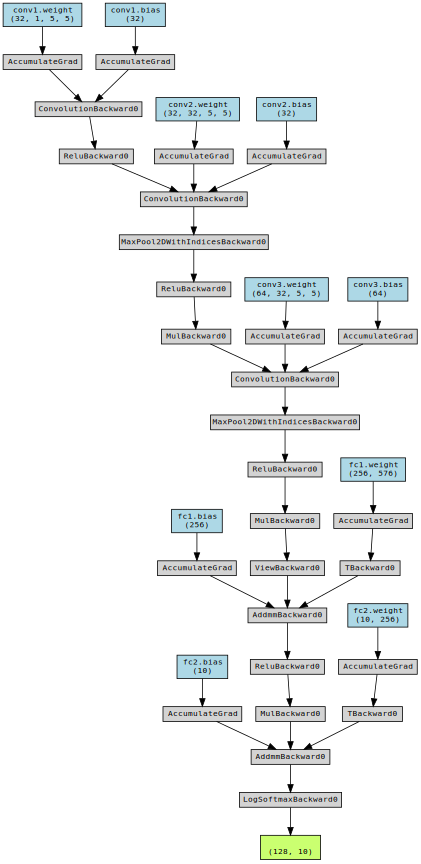

In [8]:
# get a random training batch
iterator = iter(dataloader_train)
X_batch, y_batch = next(iterator)
print(X_batch.shape, y_batch.shape, model(X_batch).shape)

# pass a batch through the model and visualize the architecture
# NOTE: we do not have to explicitly call model.forward(inputs), instead we just do model(inputs)
# This is because PyTorch internally takes care of, giving us this syntactic sugar
make_dot(model(X_batch), params=dict(model.named_parameters()))

In [9]:
!pip install torchsummary

In [10]:
from torchsummary import summary

In [11]:
summary(model.cuda(), input_size = (1,28,28), batch_size = -1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 24, 24]             832
            Conv2d-2           [-1, 32, 20, 20]          25,632
            Conv2d-3             [-1, 64, 6, 6]          51,264
            Linear-4                  [-1, 256]         147,712
            Linear-5                   [-1, 10]           2,570
Total params: 228,010
Trainable params: 228,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.26
Params size (MB): 0.87
Estimated Total Size (MB): 1.13
----------------------------------------------------------------


Now we create some utility functions to help with the training and evaluation process. Most of this is boilerplate code that can be reused with simple changes.

For training, we iterate over the datalaoder to get batches, and for each batch we do the following:

- move each batch onto the specified device
- perform a forward pass through the model to get the outputs
- compute the loss based on the outputs and targets
- compute the gradients via backpropagation
- update the weights via the optimizer

Certain layers, e.g. dropout, operate differently in training versus inference modes. To account for the same, we do:

- model.train() to set all such layers to training mode
- model.eval() to set all such layers to inference mode

In [12]:
def train(model, device, data_loader, optimizer, criterion, epoch):
    model.train()
    loss_train = 0
    num_correct = 0
    for batch_idx, (data, target) in enumerate(data_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        loss_train += loss.item()
        prediction = output.argmax(dim=1)
        num_correct += prediction.eq(target).sum().item()
        if batch_idx % 50 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.4f}\tAccuracy: {:.0f}%'.format(
                epoch, batch_idx * len(data), len(data_loader.dataset),
                100. * batch_idx / len(data_loader), loss_train / (batch_idx + 1),
                100. * num_correct / (len(data) * (batch_idx + 1))))
    loss_train /= len(data_loader)
    accuracy = num_correct / len(data_loader.dataset)
    return loss_train, accuracy


def test(model, device, data_loader, criterion):
    model.eval()
    loss_test = 0
    num_correct = 0
    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            loss_test += loss.item()  # sum up batch loss
            prediction = output.argmax(dim=1)
            num_correct += prediction.eq(target).sum().item()
    loss_test /= len(data_loader)
    accuracy = num_correct / len(data_loader.dataset)
    return loss_test, accuracy

Now we put it all together:

- Create the model
- Set up the loss function (cross entropy)
- Add an optimizer (in this case, Adam)
- [Optional] Have a learning rate scheduler

In [13]:
device = torch.device('cpu' if not torch.cuda.is_available() else 'cuda')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(1, 5):
    loss_train, acc_train = train(model, device, dataloader_train, optimizer, criterion, epoch)
    print('Epoch {} Train: Loss: {:.4f}, Accuracy: {:.3f}%\n'.format(
        epoch, loss_train, 100. * acc_train))
    loss_test, acc_test = test(model, device, dataloader_test, criterion)
    print('Epoch {} Test : Loss: {:.4f}, Accuracy: {:.3f}%\n'.format(
        epoch, loss_test, 100. * acc_test))

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.2958	Accuracy: 14%
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.3618	Accuracy: 49%
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.0714	Accuracy: 60%
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.9481	Accuracy: 64%
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.8746	Accuracy: 67%
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.8274	Accuracy: 69%
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.7861	Accuracy: 70%
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.7553	Accuracy: 71%
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.7259	Accuracy: 73%
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.7057	Accuracy: 73%
Epoch 1 Train: Loss: 0.6994, Accuracy: 73.632%

Epoch 1 Test : Loss: 0.4489, Accuracy: 83.620%

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.3696	Accuracy: 86%
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.4945	Accuracy: 81%
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.4859	Accuracy: 81%
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.4840	Accuracy: 82%
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.4789	

## Please answer the questions below to complete the experiment:

In [14]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [15]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "sdgfdjhfgjfhjh" #@param {type:"string"}

In [16]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [17]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [18]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 7855
Date of submission:  30 Jul 2025
Time of submission:  21:42:39
View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions
